In [1]:
#Author: Cong Zhu,Wanqi Chen
#Date: 2020/12
'''Import 3rd party supporting modules'''
from urllib.request import urlopen, urlretrieve
import time
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import csv
import requests
import math
import datetime

## 1. Crawl PubMed Publications given specified key word(s) and timeframe
The function return two dataframes: 1) abstract dataframe (PMID,title,abstract,publication date) 2) authors dataframe in long format (PMID, author names)

In [2]:
'''Import PubMed crawling module'''
import pub_retrieve_thread as pr

### 1.1 Extract records and save into two data files that store abstract information and author information

In [ ]:
'''For fast demo, precision radiotherapy is selected as the key word as it associates with much fewer publications'''
abstract_tab, author_tab = pr.pubmed_record().pub_tab_all_main()

Please enter a keyword:precision oncology
Range of publication time to be searched (YYYY/MM/DD - YYYY/MM/DD): 2020/01/01-2020/02/01
Number of publications: 406
Number of pages: 41


In [4]:
'''check results, number of rows should be the same as the publications'''
abstract_tab.shape

(1322, 4)

In [5]:
'''check'''
author_tab.shape

(8231, 2)

In [6]:
abstract_tab.head(10)

,Title,PMID,Publication Date,Abstract
0,Perspectives on the Barrier to Resistance for ...,31507204,2020/01/05,"In HIV-1-infected patients, virological failur..."
0,Impact of New Coronavirus Epidemics on HIV-Inf...,32167508,2020/01/01,No abstract available
0,A Proportion of Self-Collected Rectal Swabs Yi...,31523983,2020/01/05,We determined HIV-1 <i>pol</i> gene sequences ...
0,"Daphneodorins A-C, Anti-HIV Gnidimacrin Relate...",31680527,2020/01/03,Three novel gnidimacrin related macrocyclic da...
0,Fragment hopping-based discovery of novel sulf...,31735575,2020/01/01,The fragment hopping approach is widely applie...
0,Are 96-week data enough for doravirine to DRIV...,31740350,2020/01/05,No abstract available
0,Cardiovascular Conditions of Patients on HIV T...,32049175,2020/01/05,No abstract available
0,Shielding the HIV-1 capsid,31857731,2020/01/05,No abstract available
0,Insights from Ugandan genomes,31695142,2020/01/05,No abstract available
0,Understanding health spending for SDG 3,32334652,2020/01/01,No abstract available


In [7]:
author_tab.head(10)

,PMID,Authors
0,31507204,Marta Boffito
1,31507204,Laura Waters
2,31507204,Pedro Cahn
3,31507204,Roger Paredes
4,31507204,Justin Koteff
5,31507204,Jean Van Wyk
6,31507204,Tia Vincent
7,31507204,James Demarest
8,31507204,Kimberly Adkison
9,31507204,Romina Quercia


### 1.2 Export search results into .csv files

In [8]:
author_tab.to_csv("author_tab.csv")
abstract_tab.to_csv("abstract_tab.csv")

## 2. Create SQL database and extract publication information by author names

In [9]:
import sql_dump as sdp

### 2.1 Load csv files and convert them into SQL databases

In [10]:
sdp.sql_dump('author_tab.csv', 'abstract_tab.csv')

C:\Users\M-U-h\anaconda3\envs\Analyses\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


author_tab.db is created
abstract_tab.db is created


### 2.2 Extract publication records by author names from SQL database
Extracted information is saved as csv file given entered information

In [15]:
'''
pick_authors: retrieve records by author names. Break entries by comma
pub_rec: save the extracted records as .csv file . Saved file name is defined by the user
'''
pick_authors = sdp.pick_authors('Roger Paredes').pub_rec("Extract_records")

In [16]:
'''check results'''
pub_check = pd.read_csv("Extract_records.csv")
pub_check.head()

,Title,PMID,Author Name,Abstract
0,Perspectives on the Barrier to Resistance for ...,31507204,Roger Paredes,"In HIV-1-infected patients, virological failur..."


## 3.Visualization

In [17]:
import visualization as vs

### 3.1 Load search results (only abstract records data is needed)

In [18]:
abstract_tab = vs.read_csv("abstract_tab.csv")

### 3.2 Bar plot by month

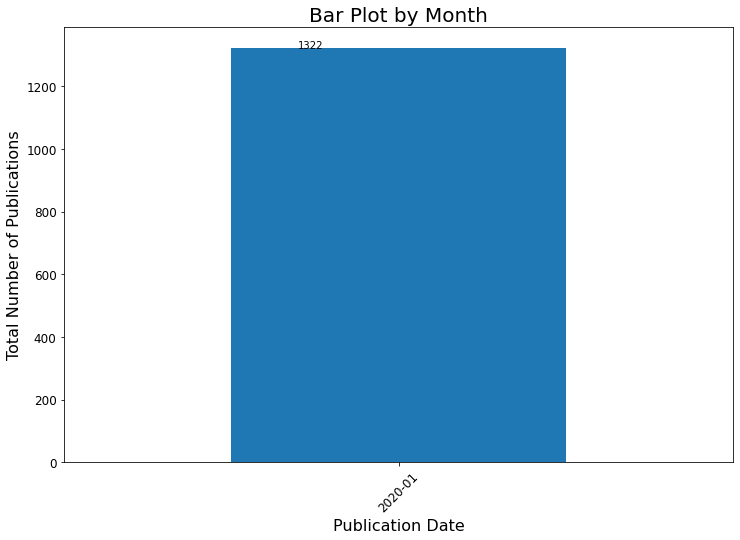

In [19]:
vs.bar_plot(abstract_tab, rotation=45)

### 3.3 Line plot by month

C:\Users\M-U-h\anaconda3\envs\Analyses\lib\site-packages\pandas\plotting\_matplotlib\core.py:1095: UserWarning: Attempting to set identical left == right == 600.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


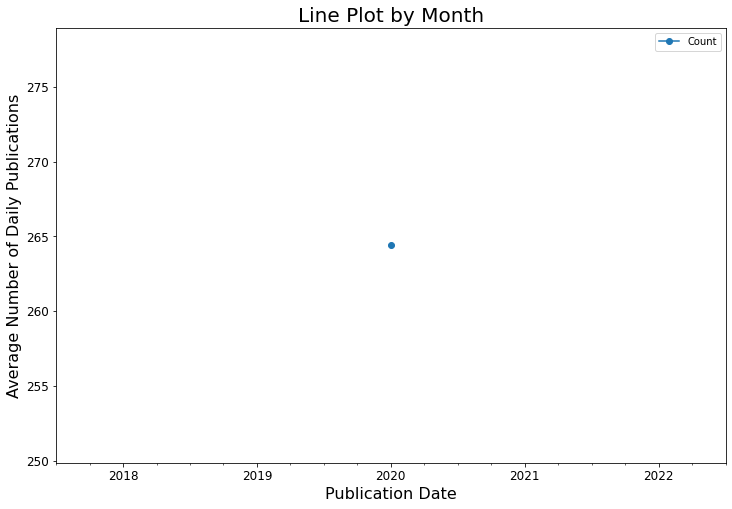

In [20]:
vs.line_plot(abstract_tab)

### 3.4 Table of descriptive statistics

In [17]:
vs.describe(abstract_tab)

         count       mean        std  min  25%  50%  75%    max
Month                                                          
2020-01   13.0   6.692308  19.631542  1.0  1.0  1.0  1.0   72.0
2020-02   13.0   1.923077   1.115164  1.0  1.0  2.0  2.0    4.0
2020-03   17.0   1.764706   0.903425  1.0  1.0  2.0  2.0    4.0
2020-04   13.0   1.461538   0.660225  1.0  1.0  1.0  2.0    3.0
2020-05   18.0   1.500000   0.618347  1.0  1.0  1.0  2.0    3.0
2020-06   15.0   1.800000   1.373213  1.0  1.0  1.0  2.0    6.0
2020-07   17.0   1.941176   1.390620  1.0  1.0  1.0  2.0    5.0
2020-08   19.0   1.947368   1.078769  1.0  1.0  2.0  2.0    4.0
2020-09   19.0   1.842105   0.764719  1.0  1.0  2.0  2.0    3.0
2020-10   23.0   3.260870   5.730440  1.0  1.0  2.0  3.0   29.0
2020-11   24.0   2.666667   4.593631  1.0  1.0  2.0  2.0   24.0
2020-12   13.0  16.384615  47.847916  1.0  1.0  2.0  3.0  175.0


,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
2020-01,13.0,6.692308,19.631542,1.0,1.0,1.0,1.0,72.0
2020-02,13.0,1.923077,1.115164,1.0,1.0,2.0,2.0,4.0
2020-03,17.0,1.764706,0.903425,1.0,1.0,2.0,2.0,4.0
2020-04,13.0,1.461538,0.660225,1.0,1.0,1.0,2.0,3.0
2020-05,18.0,1.500000,0.618347,1.0,1.0,1.0,2.0,3.0
2020-06,15.0,1.800000,1.373213,1.0,1.0,1.0,2.0,6.0
2020-07,17.0,1.941176,1.390620,1.0,1.0,1.0,2.0,5.0
2020-08,19.0,1.947368,1.078769,1.0,1.0,2.0,2.0,4.0
2020-09,19.0,1.842105,0.764719,1.0,1.0,2.0,2.0,3.0
